In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
from google.colab import files
uploaded = files.upload()


Saving archive (1) - Copy.zip to archive (1) - Copy.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
df = pd.read_csv('archive (1) - Copy.zip')   # Use the exact file name you uploaded
df.head()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [7]:
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB
None
       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_9226047  Juice        5            3.0         6.0   
freq                1   1171     2013           2429         979   

        Payment Method  Location Transaction 

In [12]:
print(df.info())  # Check columns and missing values
# Replace 'ERROR' and 'UNKNOWN' with NaN in the relevant columns
df[['Quantity', 'Price Per Unit', 'Total Spent', 'Payment Method', 'Location', 'Transaction Date']] = df[['Quantity', 'Price Per Unit', 'Total Spent', 'Payment Method', 'Location', 'Transaction Date']].replace(['ERROR', 'UNKNOWN'], pd.NA)
df.dropna(inplace=True)  # Remove rows with missing data
df = df.drop_duplicates()  # Remove duplicate rows if any
print(df.info()) # Check columns and missing values after cleaning

<class 'pandas.core.frame.DataFrame'>
Index: 4550 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    4550 non-null   object
 1   Item              4550 non-null   object
 2   Quantity          4550 non-null   object
 3   Price Per Unit    4550 non-null   object
 4   Total Spent       4550 non-null   object
 5   Payment Method    4550 non-null   object
 6   Location          4550 non-null   object
 7   Transaction Date  4550 non-null   object
dtypes: object(8)
memory usage: 319.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 3308 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    3308 non-null   object
 1   Item              3308 non-null   object
 2   Quantity          3308 non-null   object
 3   Price Per Unit    3308 non-null   object
 4   Total Spen

In [9]:
print(df.columns)

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')


In [16]:
X=df[['Quantity', 'Price Per Unit', 'Total Spent']].astype(float) # Convert columns to numeric
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_

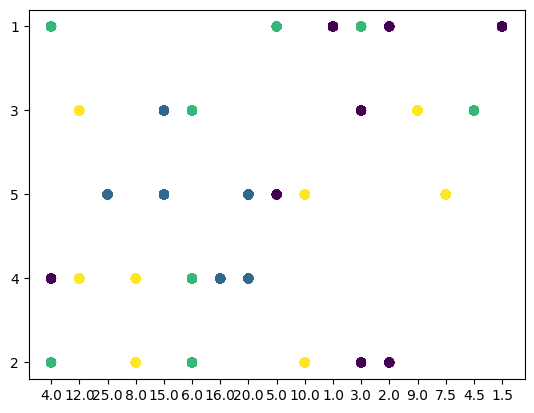

In [17]:
plt.scatter(df['Total Spent'], df['Quantity'], c=df['Cluster'])
plt.show()


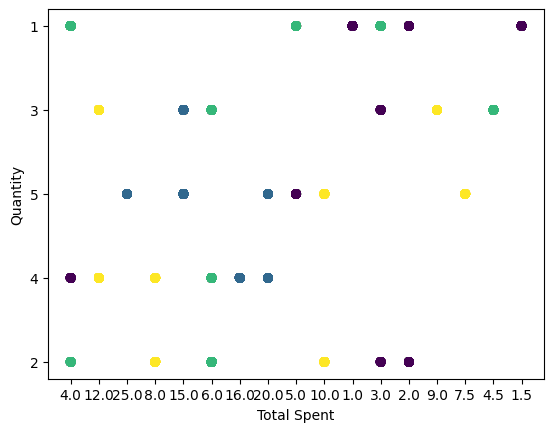

In [18]:
plt.scatter(df['Total Spent'], df['Quantity'], c=df['Cluster'])
plt.xlabel('Total Spent')
plt.ylabel('Quantity')
plt.show()



save